#Cài đặt các thư viện

In [ ]:
!pip install pygsheets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 KB 6.2 MB/s eta 0:00:00
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.12.0 requires google-auth-oauthlib<0.5,>=0.4.1, but you have google-auth-oauthlib 1.0.0 which is incompatible.


In [ ]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import pygsheets
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import sentiwordnet as swn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag
import pandas_profiling as pp

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

# Lấy dữ liệu

In [ ]:
client = pygsheets.authorize(service_file='/content/refined-grammar-372209-b3fbc4b10ebf.json')
sh = client.open('BIGDATA_PROJECT')

wks = sh.worksheet_by_title('Data')
df = wks.get_as_df()

/usr/local/lib/python3.9/dist-packages/pygsheets/worksheet.py:1554: UserWarning: At least one column name in the data frame is an empty string. If this is a concern, please specify include_tailing_empty=False and/or ensure that each column containing data has a name.
  warnings.warn('At least one column name in the data frame is an empty string. If this is a concern, please specify include_tailing_empty=False and/or ensure that each column containing data has a name.')


# **EDA**

In [ ]:
df.columns

Index(['body', 'star', 'good', 'bad', 'flair', 'flair_processed', ''], dtype='object')

In [ ]:
df['bad'] = df['bad'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5756 entries, 0 to 5755
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   body             5756 non-null   object
 1   star             5756 non-null   int64 
 2   good             5756 non-null   int64 
 3   bad              5756 non-null   int64 
 4   flair            5756 non-null   object
 5   flair_processed  5756 non-null   object
 6                    5756 non-null   object
dtypes: int64(3), object(4)
memory usage: 314.9+ KB


In [ ]:
df.head()

,body,star,good,bad,flair,flair_processed,
0,The work is easy but the employees needs a lot...,3,0,0,POSITIVE,POSITIVE,TRUE
1,Worst job ever \nIf you want a huge amount of ...,1,1,0,NEGATIVE,NEGATIVE,TRUE
2,Chances to move up but overworked for the pay\...,3,0,0,POSITIVE,POSITIVE,TRUE
3,Live fast-paced and opportunity \nWhat is the ...,5,0,1,NEGATIVE,NEGATIVE,TRUE
4,Not a good one!! The work u too hard & under p...,1,2,0,POSITIVE,POSITIVE,TRUE


In [ ]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

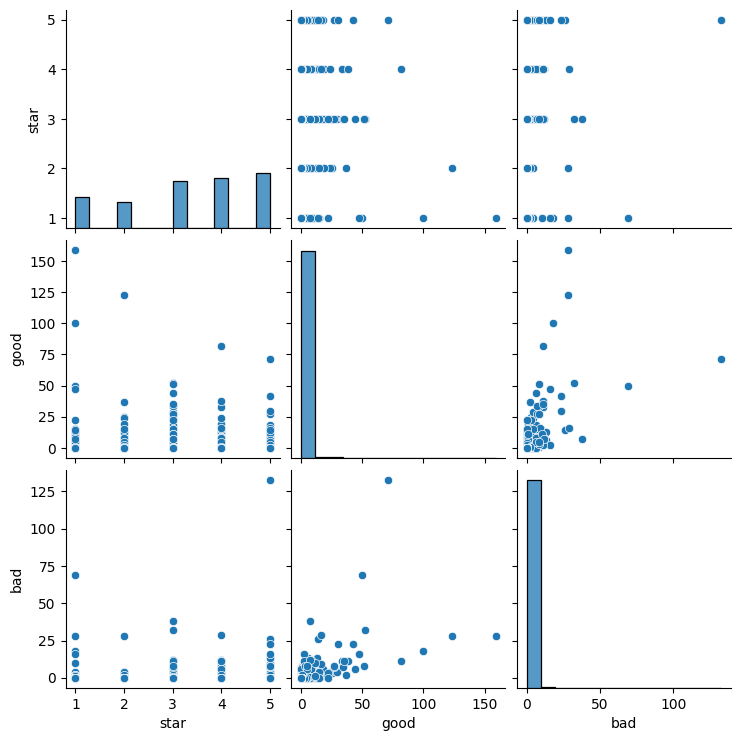

In [ ]:
sns.pairplot(df[['star','good','bad']])

In [ ]:
star = df.star.value_counts()
star

5    1528
4    1365
3    1295
1     848
2     720
Name: star, dtype: int64

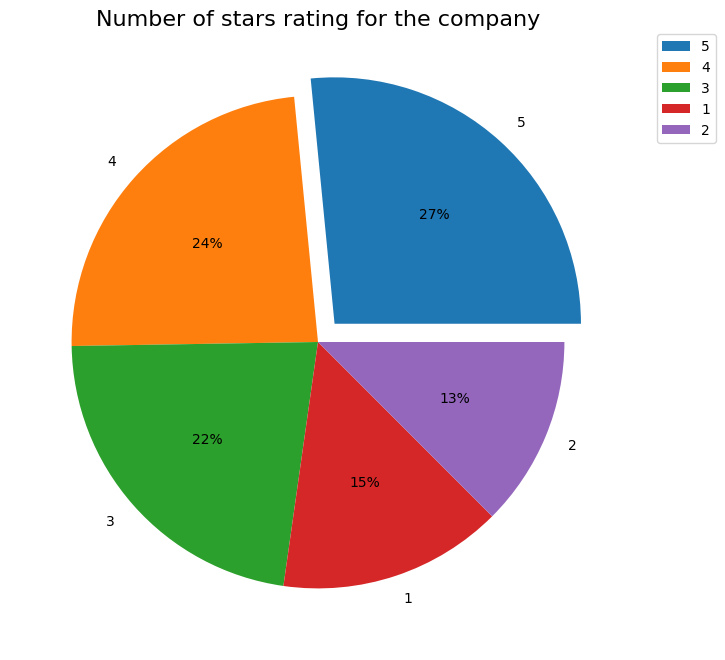

In [ ]:
plt.figure(figsize = (14, 8))
plt.pie(star, autopct='%.0f%%',explode=[0.1,0,0,0,0], 
        labels = star.keys())
plt.title('Number of stars rating for the company', size = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
df.good.value_counts()

0      5347
1       103
2        62
3        54
4        34
5        27
7        19
6        13
8        13
9        12
10       10
14        8
15        6
11        5
13        5
12        4
16        3
34        2
22        2
27        2
18        2
24        2
25        2
19        2
29        1
71        1
51        1
50        1
123       1
159       1
35        1
52        1
30        1
38        1
100       1
82        1
44        1
42        1
37        1
33        1
47        1
Name: good, dtype: int64

In [ ]:
count_cmt_good = df.drop(df.loc[df['good'] == 0].index)

In [ ]:
count_cmt_good['good'] = count_cmt_good['good'].astype(str)

In [ ]:
a = count_cmt_good.good.value_counts()
a[a < 10].index

Index(['14', '15', '11', '13', '12', '16', '34', '22', '27', '25', '18', '19',
       '24', '51', '50', '123', '159', '38', '35', '52', '71', '29', '30',
       '100', '82', '44', '42', '37', '33', '47'],
      dtype='object')

In [ ]:
index_rare = count_cmt_good[count_cmt_good.good.isin(a[a < 10].index)].index
index_rare

Int64Index([ 981, 2080, 2200, 2479, 2519, 2900, 3079, 3100, 3480, 3500, 3859,
            3939, 3960, 3999, 4020, 4059, 4099, 4100, 4279, 4320, 4359, 4440,
            4499, 4540, 4620, 4639, 4680, 4719, 4900, 5018, 5099, 5159, 5199,
            5218, 5238, 5239, 5259, 5298, 5359, 5418, 5419, 5459, 5478, 5479,
            5498, 5538, 5539, 5558, 5559, 5598, 5599, 5619, 5639, 5658, 5659,
            5678, 5679, 5698, 5718, 5719, 5738, 5739],
           dtype='int64')

In [ ]:
count_cmt_good.loc[index_rare, 'good'] = 'Other'

In [ ]:
count_cmt_good.good.value_counts()

1        103
2         62
Other     62
3         54
4         34
5         27
7         19
6         13
8         13
9         12
10        10
Name: good, dtype: int64

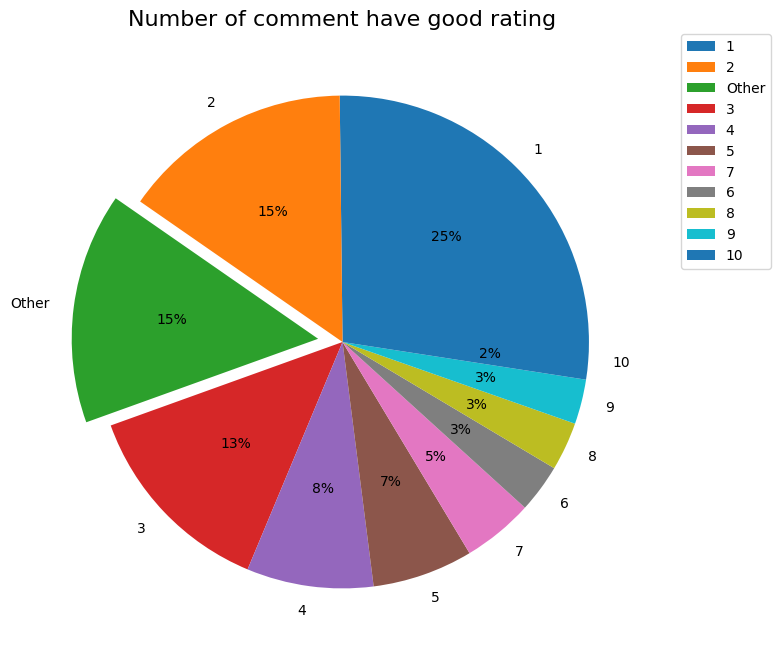

In [ ]:
plt.figure(figsize = (14, 8))
plt.pie(x = count_cmt_good['good'].value_counts().values, 
        autopct='%.0f%%', 
        explode=[0,0,0.1,0,0,0,0,0,0,0,0], 
        labels = count_cmt_good['good'].value_counts().keys())
plt.title('Number of comment have good rating', size = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
count_cmt_bad = df.drop(df.loc[df['bad'] == 0].index)

In [ ]:
count_cmt_bad['bad'] = count_cmt_bad['bad'].astype(str)

In [ ]:
b = count_cmt_bad.bad.value_counts()
b[b < 10].index

Index(['6', '8', '7', '11', '5', '10', '12', '28', '23', '16', '9', '13', '26',
       '18', '29', '38', '133', '32', '69'],
      dtype='object')

In [ ]:
index_rare1 = count_cmt_bad[count_cmt_bad.bad.isin(b[b < 10].index)].index
index_rare1

Int64Index([ 281,  301,  462, 2220, 2259, 2940, 3340, 3860, 3999, 4020, 4539,
            4620, 4640, 4719, 4900, 5058, 5078, 5099, 5178, 5219, 5238, 5278,
            5279, 5299, 5319, 5338, 5339, 5358, 5378, 5379, 5398, 5399, 5418,
            5458, 5459, 5479, 5498, 5499, 5519, 5538, 5539, 5558, 5559, 5578,
            5598, 5599, 5619, 5638, 5639, 5658, 5659, 5678, 5679, 5698, 5718,
            5719, 5738, 5739],
           dtype='int64')

In [ ]:
count_cmt_bad.loc[index_rare1, 'bad'] = 'Other'

In [ ]:
count_cmt_bad.bad.value_counts()

1        106
2         58
Other     58
3         27
4         17
Name: bad, dtype: int64

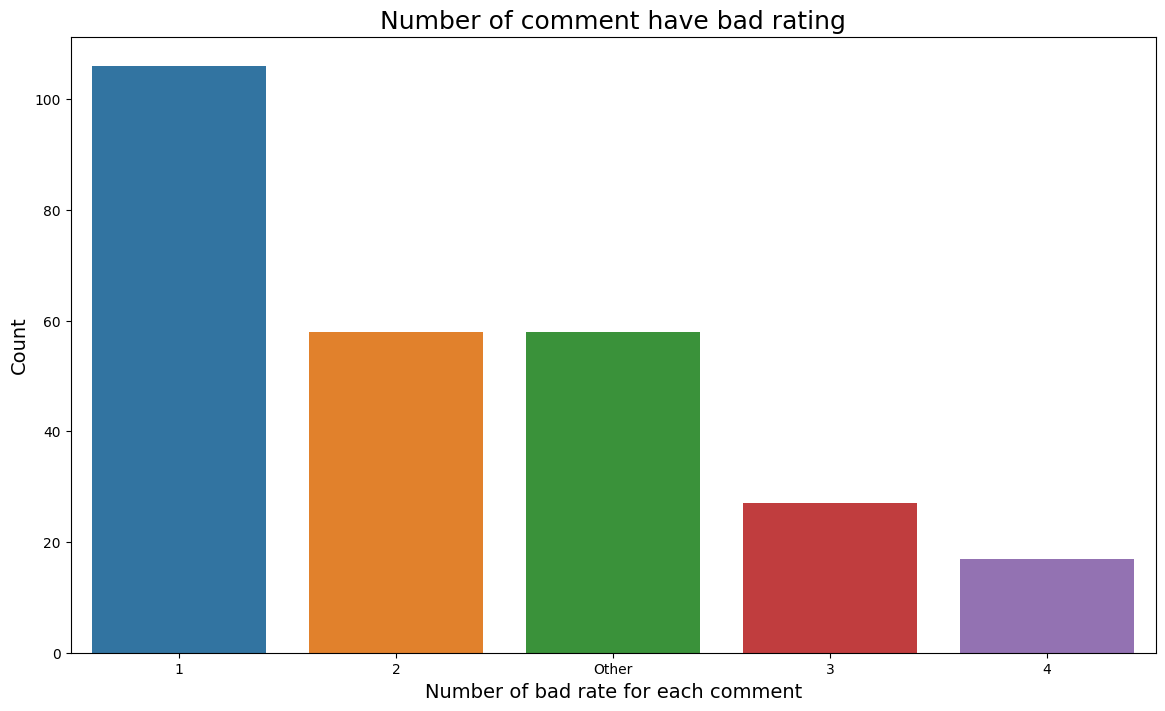

In [ ]:
plt.figure(figsize=(14, 8))
plt.title('Number of comment have bad rating', size = 18)
sns.countplot(x = 'bad', data = count_cmt_bad, order=count_cmt_bad['bad'].value_counts(ascending=False).index)
plt.xlabel('Number of bad rate for each comment', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

In [ ]:
def get_top_ngrams_with_stopwords(df, class_type, ngram_size, num_results, stopwords_list):
    # Filter the DataFrame to include only the desired class_type
    filtered_df = df[df['star']==class_type]
    
    # Initialize the CountVectorizer with the desired n-gram size and stopwords
    count_vectorizer = CountVectorizer(ngram_range=(ngram_size, ngram_size), stop_words=stopwords_list)
    
    # Fit the CountVectorizer on the filtered DataFrame text column
    count_vectorizer.fit(filtered_df['body'])
    
    # Transform the text column to a matrix of n-gram counts
    ngram_counts = count_vectorizer.transform(filtered_df['body'])
    
    # Sum the n-gram counts across all documents in the filtered DataFrame
    total_counts = ngram_counts.sum(axis=0)
    
    # Convert the total counts to a list of tuples (n-gram, count)
    ngram_list = [(ngram, total_counts[0, idx]) for ngram, idx in count_vectorizer.vocabulary_.items()]
    
    # Sort the n-gram list in descending order by count and return the top results
    top_ngrams = sorted(ngram_list, key=lambda x: x[1], reverse=True)[:num_results]
    
    return top_ngrams

In [ ]:
stopwords_list = stopwords.words('english')
star_1 = get_top_ngrams_with_stopwords(df, 1, 2, 10, stopwords_list)
star_2 = get_top_ngrams_with_stopwords(df, 2, 2, 10, stopwords_list)
star_3 = get_top_ngrams_with_stopwords(df, 3, 2, 10, stopwords_list)
star_4 = get_top_ngrams_with_stopwords(df, 4, 2, 10, stopwords_list)
star_5 = get_top_ngrams_with_stopwords(df, 5, 2, 10, stopwords_list)

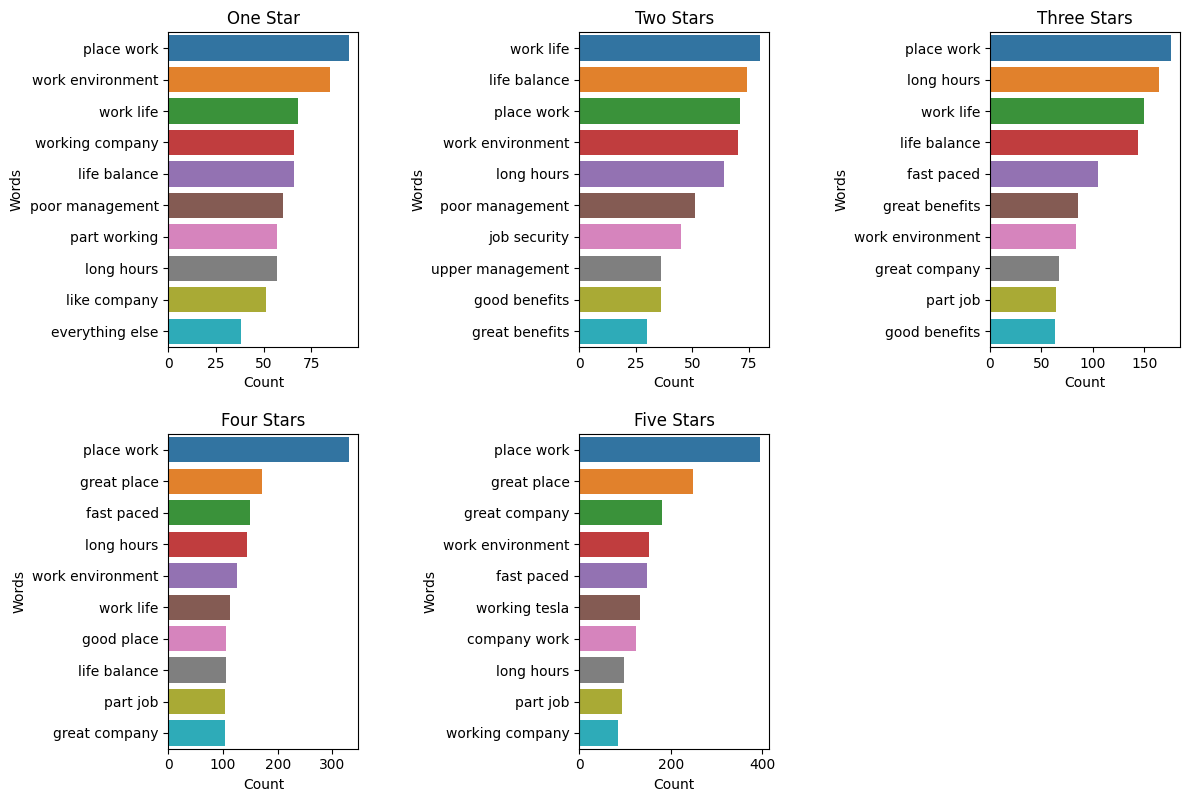

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot the bars for the first subplot
sns.barplot(y=[label for label, _ in star_1], x=[val for _, val in star_1], ax=axs[0][0])
axs[0][0].set_xlabel('Count')
axs[0][0].set_ylabel('Words')
axs[0][0].set_title('One Star')

# Plot the bars for the second subplot
sns.barplot(y=[label for label, _ in star_2], x=[val for _, val in star_2], ax=axs[0][1])
axs[0][1].set_xlabel('Count')
axs[0][1].set_ylabel('Words')
axs[0][1].set_title('Two Stars')

# Plot the bars for the third subplot
sns.barplot(y=[label for label, _ in star_3], x=[val for _, val in star_3], ax=axs[0][2])
axs[0][2].set_xlabel('Count')
axs[0][2].set_ylabel('Words')
axs[0][2].set_title('Three Stars')

# Plot the bars for the fourth subplot
sns.barplot(y=[label for label, _ in star_4], x=[val for _, val in star_4], ax=axs[1][0])
axs[1][0].set_xlabel('Count')
axs[1][0].set_ylabel('Words')
axs[1][0].set_title('Four Stars')

# Plot the bars for the fifth subplot
sns.barplot(y=[label for label, _ in star_5], x=[val for _, val in star_5], ax=axs[1][1])
axs[1][1].set_xlabel('Count')
axs[1][1].set_ylabel('Words')
axs[1][1].set_title('Five Stars')

# Adjust the space between the subplots
fig.subplots_adjust(wspace=0.5)

# Delete the last one plot invisible
axs[1][2].set_visible(False)

axs[1][0].set_position([0.24,0.125,0.228,0.343])
axs[1][1].set_position([0.55,0.125,0.228,0.343])

plt.tight_layout()
# Show the chart
plt.show()

In [ ]:
def get_top_adj_adv_ngrams(df, class_type, ngram_size, num_results, stopwords_list):
    # Filter the DataFrame to include only the desired class_type
    filtered_df = df[df['star']==class_type]
    
    # Initialize the CountVectorizer with the desired n-gram size and stopwords
    count_vectorizer = CountVectorizer(ngram_range=(ngram_size, ngram_size), stop_words=stopwords_list)
    
    # Tokenize and tag the text column with POS tags
    tagged_text = filtered_df['body'].apply(lambda x: pos_tag(word_tokenize(x)))
    
    # Filter the tagged text to include only adjectives and adverbs
    adj_adv_text = tagged_text.apply(lambda x: [word.lower() for word, pos in x if pos.startswith('JJ') or pos.startswith('RB')])
    
    # Convert the filtered text back to a string format for input to CountVectorizer
    adj_adv_text = adj_adv_text.apply(lambda x: ' '.join(x))
    
    # Fit the CountVectorizer on the filtered and POS-tagged text column
    count_vectorizer.fit(adj_adv_text)
    
    # Transform the text column to a matrix of n-gram counts
    ngram_counts = count_vectorizer.transform(adj_adv_text)
    
    # Sum the n-gram counts across all documents in the filtered DataFrame
    total_counts = ngram_counts.sum(axis=0)
    
    # Convert the total counts to a list of tuples (n-gram, count)
    ngram_list = [(ngram, total_counts[0, idx]) for ngram, idx in count_vectorizer.vocabulary_.items()]
    
    # Filter the n-gram list to include only n-grams that contain at least one adjective or adverb
    filtered_ngram_list = [(ngram, count) for ngram, count in ngram_list if any(pos.startswith('JJ') or pos.startswith('RB') for word, pos in pos_tag(ngram.split()))]
    
    # Sort the filtered n-gram list in descending order by count and return the top results
    top_ngrams2 = sorted(filtered_ngram_list, key=lambda x: x[1], reverse=True)[:num_results]   

    return top_ngrams2

In [ ]:
stopwords_list = stopwords.words('english')
count_adj_1 = get_top_adj_adv_ngrams(df, 1, 1, 10, stopwords_list)
count_adj_2 = get_top_adj_adv_ngrams(df, 2, 1, 10, stopwords_list)
count_adj_3 = get_top_adj_adv_ngrams(df, 3, 1, 10, stopwords_list)
count_adj_4 = get_top_adj_adv_ngrams(df, 4, 1, 10, stopwords_list)
count_adj_5 = get_top_adj_adv_ngrams(df, 5, 1, 10, stopwords_list)

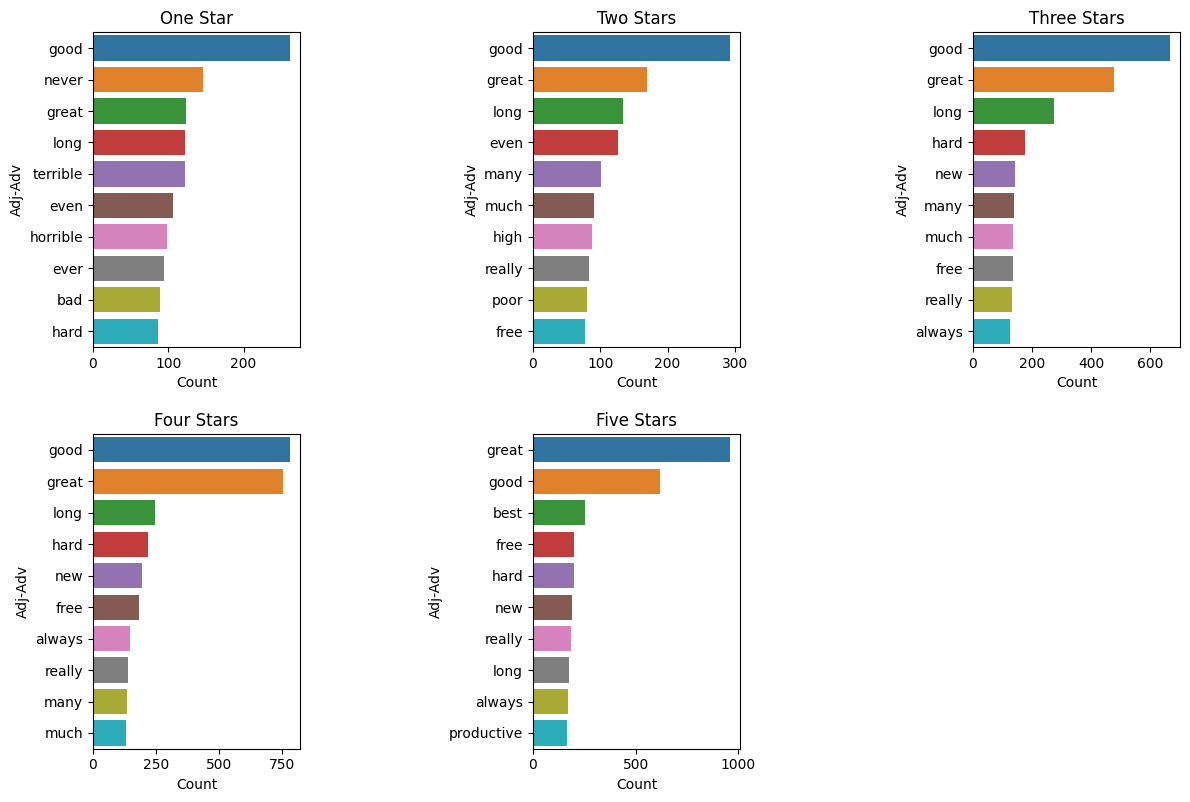

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot the bars for the first subplot
sns.barplot(y=[label for label, _ in count_adj_1], x=[val for _, val in count_adj_1], ax=axs[0][0])
axs[0][0].set_xlabel('Count')
axs[0][0].set_ylabel('Adj-Adv')
axs[0][0].set_title('One Star')

# Plot the bars for the second subplot
sns.barplot(y=[label for label, _ in count_adj_2], x=[val for _, val in count_adj_2], ax=axs[0][1])
axs[0][1].set_xlabel('Count')
axs[0][1].set_ylabel('Adj-Adv')
axs[0][1].set_title('Two Stars')

# Plot the bars for the second subplot
sns.barplot(y=[label for label, _ in count_adj_3], x=[val for _, val in count_adj_3], ax=axs[0][2])
axs[0][2].set_xlabel('Count')
axs[0][2].set_ylabel('Adj-Adv')
axs[0][2].set_title('Three Stars')

# Plot the bars for the second subplot
sns.barplot(y=[label for label, _ in count_adj_4], x=[val for _, val in count_adj_4], ax=axs[1][0])
axs[1][0].set_xlabel('Count')
axs[1][0].set_ylabel('Adj-Adv')
axs[1][0].set_title('Four Stars')

# Plot the bars for the second subplot
sns.barplot(y=[label for label, _ in count_adj_5], x=[val for _, val in count_adj_5], ax=axs[1][1])
axs[1][1].set_xlabel('Count')
axs[1][1].set_ylabel('Adj-Adv')
axs[1][1].set_title('Five Stars')

# Adjust the space between the subplots
fig.subplots_adjust(wspace=0.5)

# Delete the last one plot invisible
axs[1][2].set_visible(False)

axs[1][0].set_position([0.24,0.125,0.228,0.343])
axs[1][1].set_position([0.55,0.125,0.228,0.343])

plt.tight_layout()
# Show the chart
plt.show()

# Xử lý/ làm sạch văn bản

In [ ]:
df['clean_text'] = [str(i).lower() for i in df['body']]

In [ ]:
from urllib.parse import unquote
from datetime import datetime, timedelta
import numpy as np
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def glassdoor_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

def convert(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = text.replace('company','').replace('people','').replace('long','').replace('person','')
    return text

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def preprocess(text):
    # Tokenize the text into words
    words = word_tokenize(text.lower())
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Keep only nouns, adjectives, and adverbs
    tags = pos_tag(words)
    words = [word for word, tag in tags if tag.startswith('N') or tag.startswith('J') or tag.startswith('R')]
    # Join the words back into a string
    return words

# Stemming
def stemmer(text):
    ps = PorterStemmer()
    return [ps.stem(words) for words in text]

In [ ]:
df['clean_text'] = df['body'].apply(convert)
df['clean_text'] = [glassdoor_cleaner(str(i)) for i in df['clean_text']]
df['clean_text'] = df['clean_text'].apply(preprocess)
df['clean_text'] = df['clean_text'].apply(stemmer)

<ipython-input-40-3c682140e0a0>:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


In [ ]:
df['clean_text']

0       [work, easi, employe, need, friend, work, year...
1       [worst, job, ever, huge, amount, stress, sleep...
2       [chanc, overwork, pay, much, want, drink, kook...
3       [live, fast, opportun, best, part, free, shutt...
4       [good, work, u, hard, pay, u, best, part, none...
                              ...                        
5751    [product, fun, workplac, public, electr, car, ...
5752    [unclear, direct, perform, high, level, subser...
5753    [good, compani, intens, labor, tesla, great, h...
5754    [start, realli, comment, tesla, ipo, thing, va...
5755    [product, fun, place, good, hard, staff, great...
Name: clean_text, Length: 5756, dtype: object

#Flair

In [ ]:
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 38.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 KB 41.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 23.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Pr

##Đoạn văn bản ĐÃ xử lý

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load('en-sentiment')

2023-04-04 13:02:19,377 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpxytawunp


100%|██████████| 253M/253M [00:09<00:00, 26.7MB/s]

2023-04-04 13:02:29,671 copying /tmp/tmpxytawunp to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2023-04-04 13:02:30,849 removing temp file /tmp/tmpxytawunp


In [ ]:
df['join_text'] = [' '.join(i) for i in df['clean_text']]

In [ ]:
label = []
for i in range(0,len(df)):
  sentence = Sentence(df.loc[i,'join_text'])
  classifier.predict(sentence)
  label.append(sentence.tag)

In [ ]:
df['flair_processed'] = label
df['flair_processed'].value_counts()

POSITIVE    3821
NEGATIVE    1935
Name: flair_processed, dtype: int64

In [ ]:
wks.set_dataframe(df[['flair_processed']],start = 'F2', copy_head =False)

In [ ]:
elvaluate_df = df[df['star'] != 3]
elvaluate_df

,body,star,good,bad,flair,flair_processed,,clean_text,join_text
1,Worst job ever \nIf you want a huge amount of ...,1,1,0,NEGATIVE,NEGATIVE,TRUE,"[worst, job, ever, huge, amount, stress, sleep...",worst job ever huge amount stress sleep bad ma...
3,Live fast-paced and opportunity \nWhat is the ...,5,0,1,NEGATIVE,POSITIVE,TRUE,"[live, fast, opportun, best, part, free, shutt...",live fast opportun best part free shuttl work ...
4,Not a good one!! The work u too hard & under p...,1,2,0,POSITIVE,POSITIVE,TRUE,"[good, work, u, hard, pay, u, best, part, none...",good work u hard pay u best part none zip zero...
5,I would not recommend anyone to apply for any ...,1,2,0,POSITIVE,POSITIVE,TRUE,"[anyon, appli, posit, mainten, crew, best, par...",anyon appli posit mainten crew best part noth ...
6,Company Culture \nStaff is not respected. Only...,1,1,0,NEGATIVE,POSITIVE,FALSE,"[compani, cultur, staff, busi, input, matter, ...",compani cultur staff busi input matter compani...
...,...,...,...,...,...,...,...,...,...
5749,"7.5 out 0f 10\nnot a bad place to work, 6am-23...",5,0,0,,NEGATIVE,,"[f, bad, place, work, pm, benefit, good, nveri...",f bad place work pm benefit good nveri easi job
5750,Enjoy Solarcity\nI work hard everyday and go h...,4,0,0,,POSITIVE,,"[enjoy, solarc, work, hard, everyday, home, th...",enjoy solarc work hard everyday home that job ...
5751,Productive and fun workplace\n• Educate the pu...,5,0,0,,POSITIVE,,"[product, fun, workplac, public, electr, car, ...",product fun workplac public electr car industr...
5754,From start-up to IPO\nI really can't comment o...,4,0,0,,NEGATIVE,,"[start, realli, comment, tesla, ipo, thing, va...",start realli comment tesla ipo thing vastli di...


In [ ]:
elvaluate_df['actual_rating'] = [0 if i < 3 else 1 for i in elvaluate_df['star']]
elvaluate_df['flair_num'] = [0 if i == 'NEGATIVE' else 1 for i in elvaluate_df['flair']]
elvaluate_df['processed_num'] = [0 if i == 'NEGATIVE' else 1 for i in elvaluate_df['flair_processed']]

<ipython-input-55-5a84b3b5d120>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elvaluate_df['actual_rating'] = [0 if i < 3 else 1 for i in elvaluate_df['star']]
<ipython-input-55-5a84b3b5d120>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elvaluate_df['flair_num'] = [0 if i == 'NEGATIVE' else 1 for i in elvaluate_df['flair']]
<ipython-input-55-5a84b3b5d120>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

## Đoạn văn bản CHƯA xử lý

In [ ]:
classifier = TextClassifier.load('en-sentiment')
label = []
for i in range(0,len(df)):
  sentence = Sentence(df.loc[i,'body'])
  classifier.predict(sentence)
  label.append(sentence.tag)

In [ ]:
df['flair'] = label

In [ ]:
df['flair'].value_counts()

POSITIVE    3029
NEGATIVE    2727
Name: flair, dtype: int64

In [ ]:
wks.set_dataframe(df[['flair']],start = 'E2', copy_head =False)

## Đánh giá và lựa chọn mô hình

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(true, pred):
  print('accuracy_score:', accuracy_score(true,pred))
  print('precision_score:', precision_score(true,pred))
  print('recall_score:', recall_score(true,pred))
  print('f1_score:', f1_score(true,pred))

In [ ]:
evaluate(elvaluate_df['actual_rating'].values,elvaluate_df['flair_num'])

accuracy_score: 0.5297018605693791
precision_score: 0.6695095948827292
recall_score: 0.5426892499135845
f1_score: 0.5994654448262695


In [ ]:
evaluate(elvaluate_df['actual_rating'].values,elvaluate_df['processed_num'])

accuracy_score: 0.7836807890607487
precision_score: 0.8200531208499336
recall_score: 0.8537849982716903
f1_score: 0.8365791701947503


#Mô hình máy học để phân loại cảm xúc

## Xác định dữ liệu đầu vào

In [ ]:
index = []
for i in range(0,len(df)):
  if (df.loc[i,'star'] > 3) & (df.loc[i,'flair'] != 'NEGATIVE'):
    index.append(i)
  elif (df.loc[i,'star'] < 3) & (df.loc[i,'flair'] != 'POSITIVE'):
    index.append(i)
index = list(set(index))
len(index)

3811

In [ ]:
train_df = df.iloc[index]
input = df.iloc[df.index.drop(index)]

In [ ]:
train_df['segment_num'] = train_df['flair'].map({
    'POSITIVE': 1,
    'NEGATIVE': 0
})
df.head()

<ipython-input-65-94ebe509f294>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['segment_num'] = train_df['flair'].map({


,body,star,good,bad,flair,flair_processed,,clean_text,join_text
0,The work is easy but the employees needs a lot...,3,0,0,NEGATIVE,NEGATIVE,TRUE,"[work, easi, employe, need, friend, work, year...",work easi employe need friend work year tesla ...
1,Worst job ever \nIf you want a huge amount of ...,1,1,0,NEGATIVE,NEGATIVE,TRUE,"[worst, job, ever, huge, amount, stress, sleep...",worst job ever huge amount stress sleep bad ma...
2,Chances to move up but overworked for the pay\...,3,0,0,NEGATIVE,NEGATIVE,TRUE,"[chanc, overwork, pay, much, want, drink, kook...",chanc overwork pay much want drink kook aid sp...
3,Live fast-paced and opportunity \nWhat is the ...,5,0,1,POSITIVE,POSITIVE,TRUE,"[live, fast, opportun, best, part, free, shutt...",live fast opportun best part free shuttl work ...
4,Not a good one!! The work u too hard & under p...,1,2,0,NEGATIVE,POSITIVE,TRUE,"[good, work, u, hard, pay, u, best, part, none...",good work u hard pay u best part none zip zero...


## Chia tập train, test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_df.join_text, 
    train_df.segment_num, 
    test_size=0.2,
    random_state=2022,
    stratify=train_df.segment_num
)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (3048,)
Shape of X_test:  (763,)


## Mô hình KNN




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

#1. create a pipeline object
clf_knn = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf_knn.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf_knn.predict(X_test)

## Mô hình MultinomialNB


In [ ]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf_mnb = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf_mnb.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf_mnb.predict(X_test)


## Mô hình Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

#1. create a pipeline object
clf_lrg = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('LogisticRegression', LogisticRegression())         
])

#2. fit with X_train and y_train
clf_lrg.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf_lrg.predict(X_test)


## Đánh giá các mô hình

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def classifier_metrics(report_title, model): 
    '''
    Input a model and calculate predictions with X_test.
    Print a summary of classifier metrics from sklearn.metrics calculated with 
    y_test and preds
    returns df that can be compiled into summary table
    '''
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, preds)
    metrics = {
        'model': report_title, 
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy, 
        'f1_score': f1, 
    }
    df = pd.DataFrame(metrics.items()).T
    df.columns = df.iloc[0]
    df = df[1:]
    return df

In [ ]:
metrics1 = classifier_metrics('TF-IDF + KNN', clf_knn)
metrics2 = classifier_metrics('TF-IDF + Multinomial Naive Bayes', clf_mnb)
metrics3 = classifier_metrics('TF-IDF + Logistic Regression', clf_lrg)

metrics = pd.concat([metrics1, metrics2, metrics3]).sort_values('test_accuracy')
metrics 

,model,train_accuracy,test_accuracy,f1_score
1,TF-IDF + KNN,0.857612,0.791612,0.852093
1,TF-IDF + Multinomial Naive Bayes,0.895341,0.832241,0.881481
1,TF-IDF + Logistic Regression,0.955709,0.91481,0.933606


## Dự đoán kết quả cho phần dữ liệu chưa thể xác định bằng Flair

In [ ]:
output = clf_lrg.predict(input['join_text'])

In [ ]:
input['predicted_model'] = output

<ipython-input-74-bacd9f2d7999>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['predicted_model'] = output


In [ ]:
input

,body,star,good,bad,flair,flair_processed,,clean_text,join_text,predicted_model
0,The work is easy but the employees needs a lot...,3,0,0,NEGATIVE,NEGATIVE,TRUE,"[work, easi, employe, need, friend, work, year...",work easi employe need friend work year tesla ...,0
2,Chances to move up but overworked for the pay\...,3,0,0,NEGATIVE,NEGATIVE,TRUE,"[chanc, overwork, pay, much, want, drink, kook...",chanc overwork pay much want drink kook aid sp...,0
7,Toxic Work Environment \nEven if you go to jus...,3,1,0,NEGATIVE,NEGATIVE,TRUE,"[toxic, work, environ, even, job, group, hour,...",toxic work environ even job group hour night n...,0
16,"Fun people, terribly overworked\nWhile I enjoy...",3,0,0,NEGATIVE,POSITIVE,TRUE,"[fun, terribl, enjoy, next, great, mainli, one...",fun terribl enjoy next great mainli one hand d...,1
20,I just want to see the reviews lol\nOkay so ba...,3,0,0,POSITIVE,NEGATIVE,TRUE,"[want, see, review, basic, interview, lot, col...",want see review basic interview lot cold inter...,0
...,...,...,...,...,...,...,...,...,...,...
5743,"day to day.\ntypical day at Solar City, wake a...",3,0,0,POSITIVE,POSITIVE,TRUE,"[day, day, typic, day, solar, citi, wake, caus...",day day typic day solar citi wake caus enjoy e...,1
5746,good company\ngreat new company to work with 1...,3,0,0,POSITIVE,POSITIVE,FALSE,"[good, great, new, work, hour, day, great, co,...",good great new work hour day great co worker,1
5748,Fun Place to work\nIt's a great place to work ...,3,0,0,POSITIVE,POSITIVE,,"[fun, place, work, great, place, work, stat, w...",fun place work great place work stat work hour...,1
5752,"Very unclear direction,\nBe prepared to perfor...",3,0,0,NEGATIVE,NEGATIVE,,"[unclear, direct, perform, high, level, subser...",unclear direct perform high level subservi cou...,0


In [ ]:
wks = sh.worksheet_by_title('ML output')
# wks.set_dataframe(input[['body','star','flair','predicted_model']],start='A1',copy_head=True)

In [ ]:
input['flair'] = ['POSITIVE' if i == 1 else 'NEGATIVE' for i in input['predicted_model']]
final_df = pd.concat([train_df,input], axis =0)

<ipython-input-77-04e46b3fb040>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['flair'] = ['POSITIVE' if i == 1 else 'NEGATIVE' for i in input['predicted_model']]


In [ ]:
final_df

,body,star,good,bad,flair,flair_processed,,clean_text,join_text,segment_num,predicted_model
1,Worst job ever \nIf you want a huge amount of ...,1,1,0,NEGATIVE,NEGATIVE,TRUE,"[worst, job, ever, huge, amount, stress, sleep...",worst job ever huge amount stress sleep bad ma...,0.0,NaN
3,Live fast-paced and opportunity \nWhat is the ...,5,0,1,POSITIVE,POSITIVE,TRUE,"[live, fast, opportun, best, part, free, shutt...",live fast opportun best part free shuttl work ...,1.0,NaN
4,Not a good one!! The work u too hard & under p...,1,2,0,NEGATIVE,POSITIVE,TRUE,"[good, work, u, hard, pay, u, best, part, none...",good work u hard pay u best part none zip zero...,0.0,NaN
5,I would not recommend anyone to apply for any ...,1,2,0,NEGATIVE,POSITIVE,TRUE,"[anyon, appli, posit, mainten, crew, best, par...",anyon appli posit mainten crew best part noth ...,0.0,NaN
6,Company Culture \nStaff is not respected. Only...,1,1,0,NEGATIVE,POSITIVE,FALSE,"[compani, cultur, staff, busi, input, matter, ...",compani cultur staff busi input matter compani...,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5743,"day to day.\ntypical day at Solar City, wake a...",3,0,0,POSITIVE,POSITIVE,TRUE,"[day, day, typic, day, solar, citi, wake, caus...",day day typic day solar citi wake caus enjoy e...,NaN,1.0
5746,good company\ngreat new company to work with 1...,3,0,0,POSITIVE,POSITIVE,FALSE,"[good, great, new, work, hour, day, great, co,...",good great new work hour day great co worker,NaN,1.0
5748,Fun Place to work\nIt's a great place to work ...,3,0,0,POSITIVE,POSITIVE,,"[fun, place, work, great, place, work, stat, w...",fun place work great place work stat work hour...,NaN,1.0
5752,"Very unclear direction,\nBe prepared to perfor...",3,0,0,NEGATIVE,NEGATIVE,,"[unclear, direct, perform, high, level, subser...",unclear direct perform high level subservi cou...,NaN,0.0


In [ ]:
final = final_df[['body','clean_text','join_text','star','good','bad','flair']]

In [ ]:
wks = sh.worksheet_by_title('Final')
# wks.set_dataframe(final,start='A1',copy_head=True)

#Nhận xét

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

def build_wordcloud(df, score, con, max_words=100, background_color='white', width=800, height=400):
    """
    Build a word cloud from the input dataframe column.
    """
    text = df[df[score]==con]['clean_text'].to_string(index=False)

    tokens = nltk.word_tokenize(text)
    tags = pos_tag(tokens)
    adj_adv_tags = ['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS']
    adj_adv_tokens = [t[0] for t in tags if t[1] in adj_adv_tags]
    adj_adv_text = ' '.join(adj_adv_tokens)

    wordcloud = WordCloud(max_words=max_words, background_color=background_color, width=width, height=height)
    wordcloud.generate(adj_adv_text)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def get_top_ngrams_df(df, text_col, ngram_range=(1, 1), top_n=20):
    # Create a CountVectorizer object with the specified n-gram range
    vectorizer = CountVectorizer(ngram_range=ngram_range)

    # Fit the vectorizer to the text data
    vectorizer.fit(df[text_col])

    # Transform the text data into a matrix of n-gram counts
    X = vectorizer.transform(df[text_col])

    # Compute the sum of n-gram counts across all documents
    ngram_counts = X.sum(axis=0)

    # Convert the n-gram counts into a list of tuples (ngram, count)
    ngram_counts_list = [(ngram, count) for ngram, count in zip(vectorizer.get_feature_names_out(), ngram_counts.tolist()[0])]

    # Create a DataFrame of n-gram counts
    df_ngram_counts = pd.DataFrame(ngram_counts_list, columns=['ngram', 'count'])

    # Sort the DataFrame in descending order of count and get the top n-grams
    top_ngrams = df_ngram_counts.sort_values('count', ascending=False)[:top_n]

    # Return the top n-grams DataFrame
    return top_ngrams


## Tổng quan

Text(0.5, 1.0, 'Trước khi dùng mô hình dự đoán')

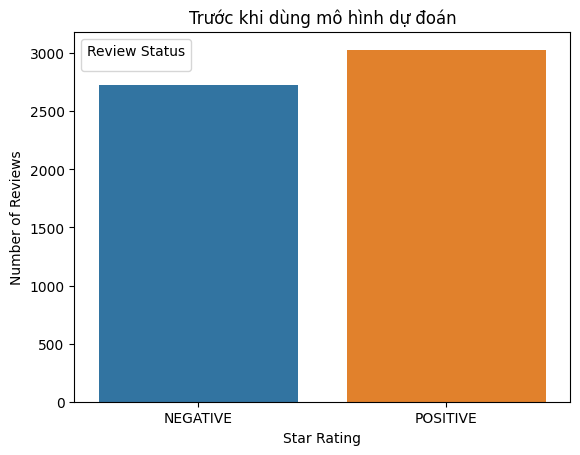

In [ ]:
gb_data = df.groupby(['flair'])['body'].count().reset_index()
ax = sns.barplot(x='flair', y='body', data=gb_data)
ax.set_xlabel('Star Rating')
ax.set_ylabel('Number of Reviews')
ax.legend(title='Review Status', loc='best')
ax.set_title('Trước khi dùng mô hình dự đoán')

Text(0.5, 1.0, 'Sau khi dùng mô hình dự đoán')

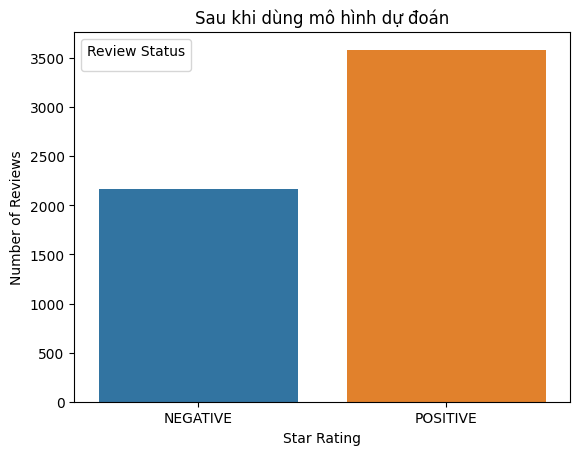

In [ ]:
gb_data = final.groupby(['flair'])['body'].count().reset_index()
ax = sns.barplot(x='flair', y='body', data=gb_data)
ax.set_xlabel('Star Rating')
ax.set_ylabel('Number of Reviews')
ax.legend(title='Review Status', loc='best')
ax.set_title('Sau khi dùng mô hình dự đoán')

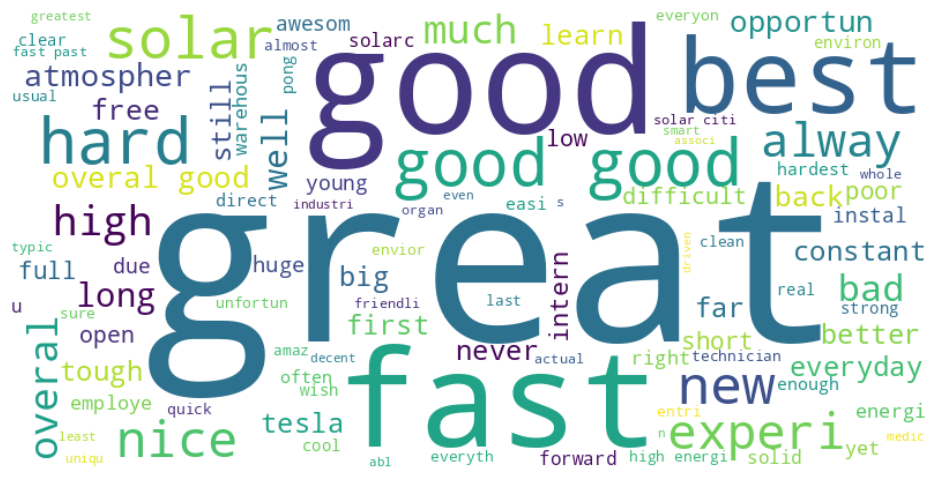

In [ ]:
build_wordcloud(final,'flair','POSITIVE')

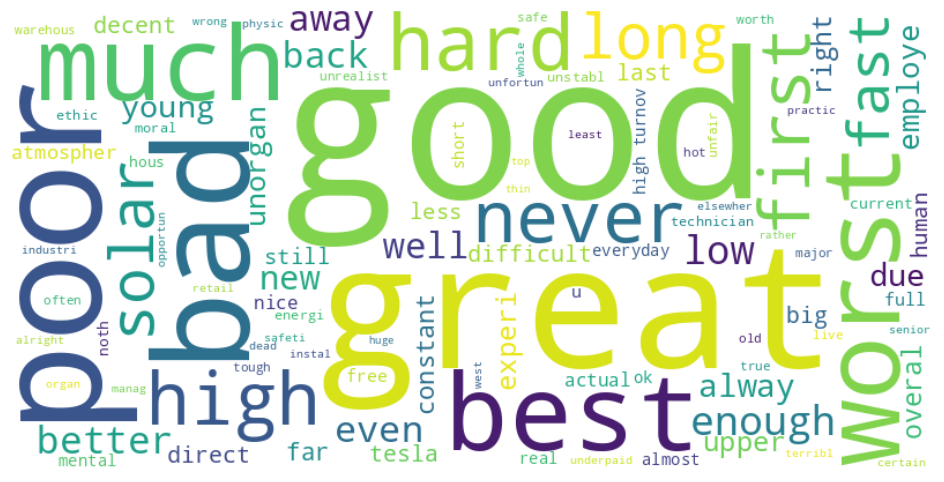

In [ ]:
build_wordcloud(final,'flair','NEGATIVE')

## Theo số sao đánh giá

Text(0.5, 1.0, 'Trước khi dùng mô hình dự đoán')

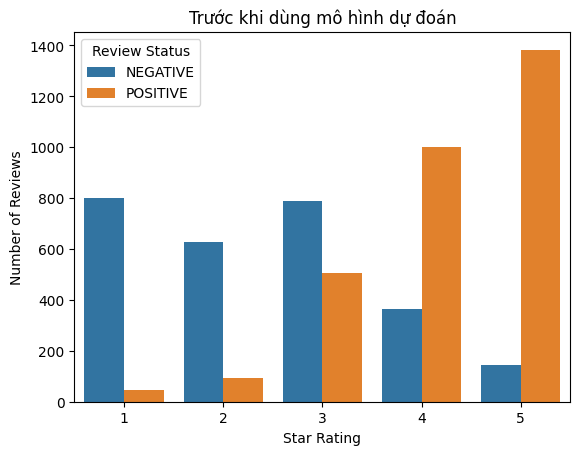

In [ ]:
gb_data = df.groupby(['star','flair'])['body'].count().reset_index()
ax = sns.barplot(x='star', y='body', hue='flair', data=gb_data)
ax.set_xlabel('Star Rating')
ax.set_ylabel('Number of Reviews')
ax.legend(title='Review Status', loc='best')
ax.set_title('Trước khi dùng mô hình dự đoán')

Text(0.5, 1.0, 'Sau khi dùng mô hình dự đoán')

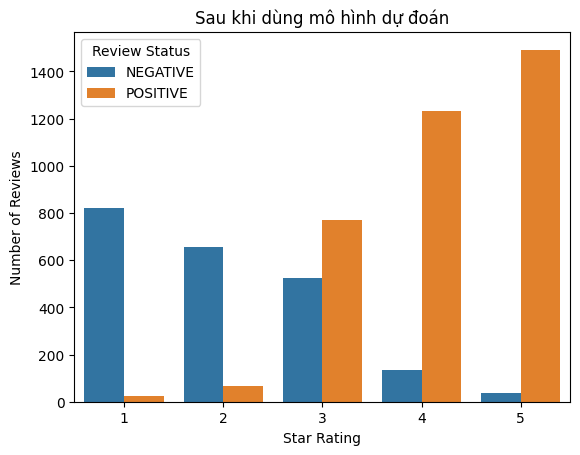

In [ ]:
gb_data = final.groupby(['star','flair'])['body'].count().reset_index()
ax = sns.barplot(x='star', y='body', hue='flair', data=gb_data)
ax.set_xlabel('Star Rating')
ax.set_ylabel('Number of Reviews')
ax.legend(title='Review Status', loc='best')
ax.set_title('Sau khi dùng mô hình dự đoán')

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5756 entries, 1 to 5753
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   body        5756 non-null   object
 1   clean_text  5756 non-null   object
 2   join_text   5756 non-null   object
 3   star        5756 non-null   int64 
 4   good        5756 non-null   int64 
 5   bad         5756 non-null   int64 
 6   flair       5756 non-null   object
dtypes: int64(3), object(4)
memory usage: 359.8+ KB


<Axes: xlabel='ngram'>

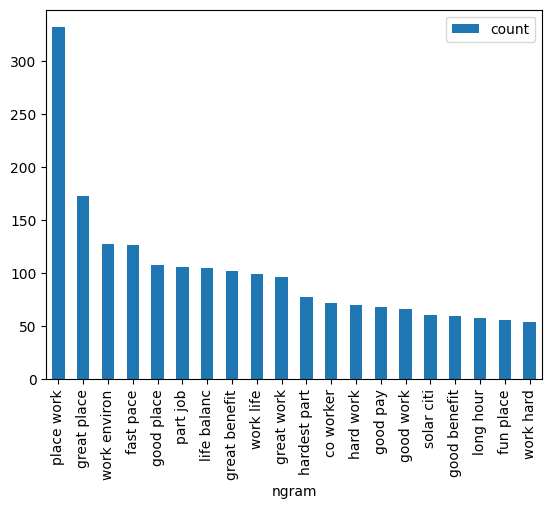

In [ ]:
false_neg = get_top_ngrams_df(final[(final['star'] == 4) | (final['star'] == 5) & (final['flair']=='NEGATIVE')],'join_text',ngram_range=(2,2))
false_neg.plot.bar('ngram','count')

<Axes: xlabel='ngram'>

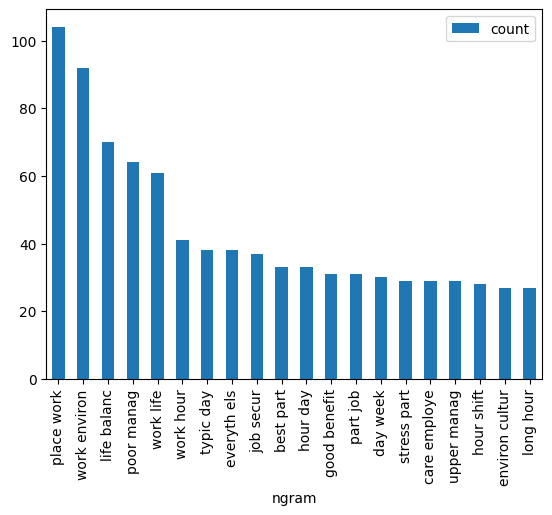

In [ ]:
false_pos = get_top_ngrams_df(final[(final['star'] == 1) | (final['star'] == 2) & (final['flair']=='POSITIVE')],'join_text',ngram_range=(2,2))
false_pos.plot.bar('ngram','count')

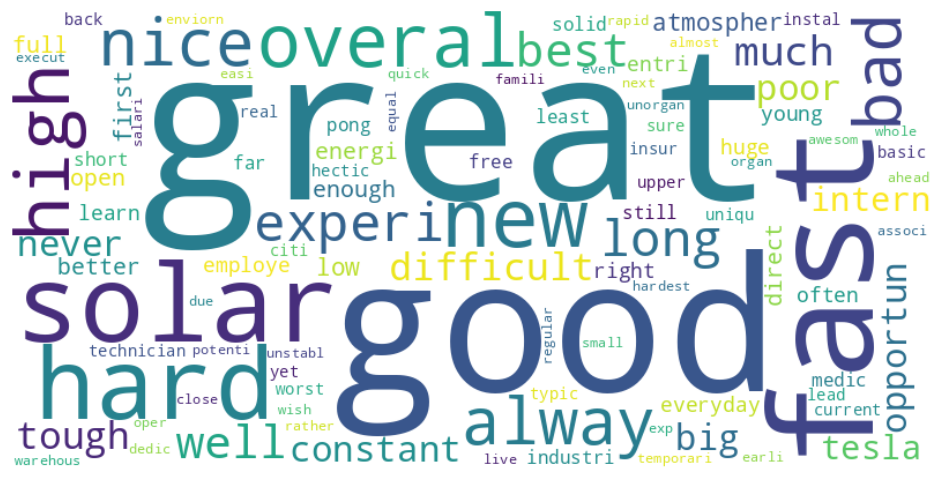

In [ ]:
build_wordcloud(final[(final['star'] == 3)],'flair','POSITIVE')

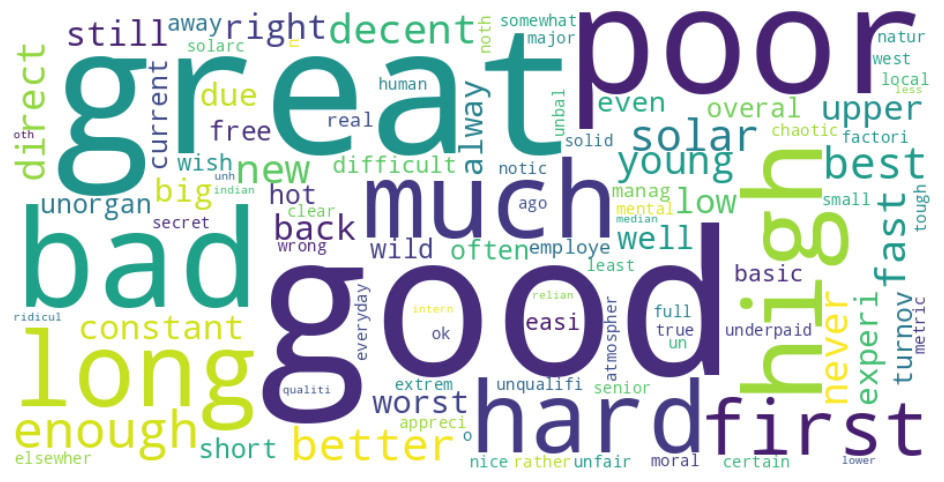

In [ ]:
build_wordcloud(final[(final['star'] == 3)],'flair','NEGATIVE')